In [28]:
from IPython.display import Image
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
</form>''')

# Notes from Stanford DB4: Relational Algebra 

Lecture notes from the online [mini-course on Relational Algebra](https://lagunita.stanford.edu/courses/DB/RA/SelfPaced/about) from the   [Stanford Online self paced Databases course](https://lagunita.stanford.edu/courses/DB/2014/SelfPaced/about).

<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

In [35]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Select, Project, Join (Lecture 1)

A query (expression) on set of relations produces relation as result. (I.e. a query from a relational database outputs a relational table.)

**Thre relations used in this lecture:** (keys in *italics*)

- College(*cName*, state, enrolment)
- Student(*sID*, sName, GPA, sizeHS)
- Apply(*sID, cName, major*, decision)

Keys **have to** be unique.

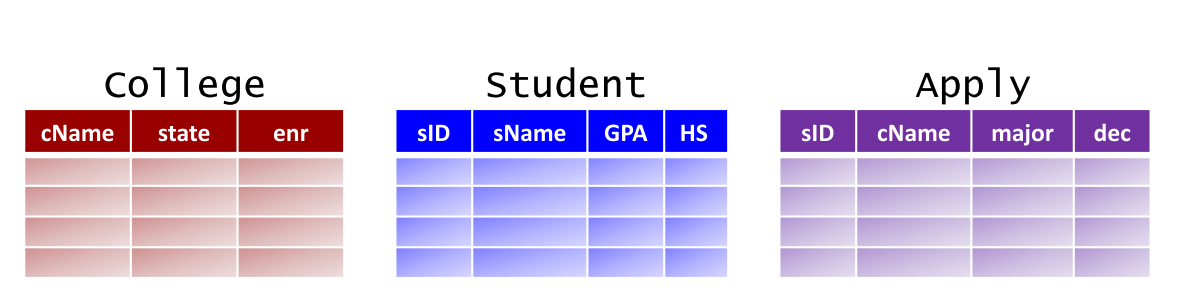

In [4]:
Image(filename="files/relations.png")

## Simplest query: relation name

E.g. simply: Student -> will result in entire Student table.

## Select operator: picks certain rows

$\sigma$ = select operator. Picks **rows**.

Examples:

- Students with GPA>3.7
    - $\sigma_{GPA>3.7}$ Student
- Students with GPA>3.7 and HS<1000
    - $\sigma_{GPA>3.7 \land HS<1000}$ Student
- Applications to Stanford CS major
    - $\sigma_{CName = 'Stanford' \land major='cs'}$ Apply

General case: $\sigma_{condition}$ Relation (or expression/query)

## Project operator: picks certain columns

$\pi$ = project operator. Picks **columns**.

Example:

$\pi_{sID,dec}$ Apply

General case: $\pi_{A_1,...,A_n}$ Relation (or expression/query), where A1...An are columns.

## To pick both rows and columns

Remember: a query of a relation creates a relation, thus on can query a query.

Example:

$\pi_{sID, sName}(\sigma_{GPA>3.7} Student)$

Querying a query works an infinite amount of times.

## Duplicates

The semantics of relational algebra says the duplicates are **always** eleminated. E.g. if a query returns a relation with a lot of duplicates, there will be, at most, one instance of each combination of values. **But this does not apply to SQL.**

- SQL semantics: Multisets, bags 
- Relational algebra: Sets

## Cross-product: combine two relations

A.k.a. Cartesian product. "Simply" to multiply two relations, with the result of every combination of tuples from those relations. E.g. if Student has S tuples and Apply has A tuples, the resulting number of tuples after a cross-product is `S*A`.

If similar names on attributes occur when doing a cross-product, the notation will be 'Relation.Attribute', like `Student.sID` and `Apply.sID`.

What's the use for this? It's very useful in combination with other operators.

Example: Names and GPAs of students with HS $>$ 1000 who applied to CS and were rejected.

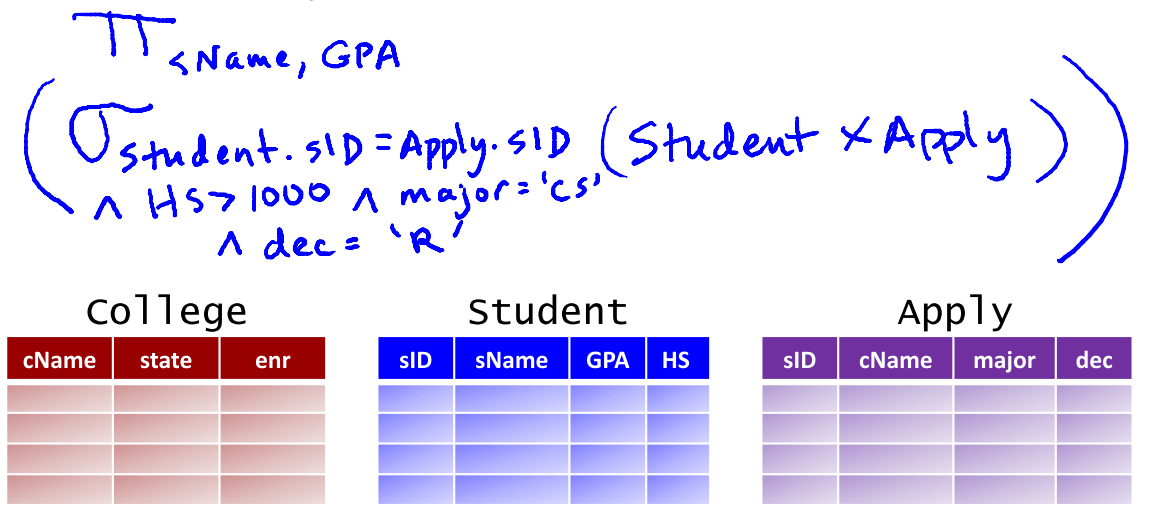

In [5]:
Image(filename="files/cross-product2.png")

## Natural Join

Performs a cross-product, but has additional rules:

- It enforces equality on all attributes with same name.
- Eliminate one copy of duplicate attributes.

"columns with same name of associate tables will appear once only."

$\bowtie$ = Natural join operator.

Example: Names and GPAs of students with HS $>$ 1000 who applied to CS at college with enr > 20,000 and were rejected.

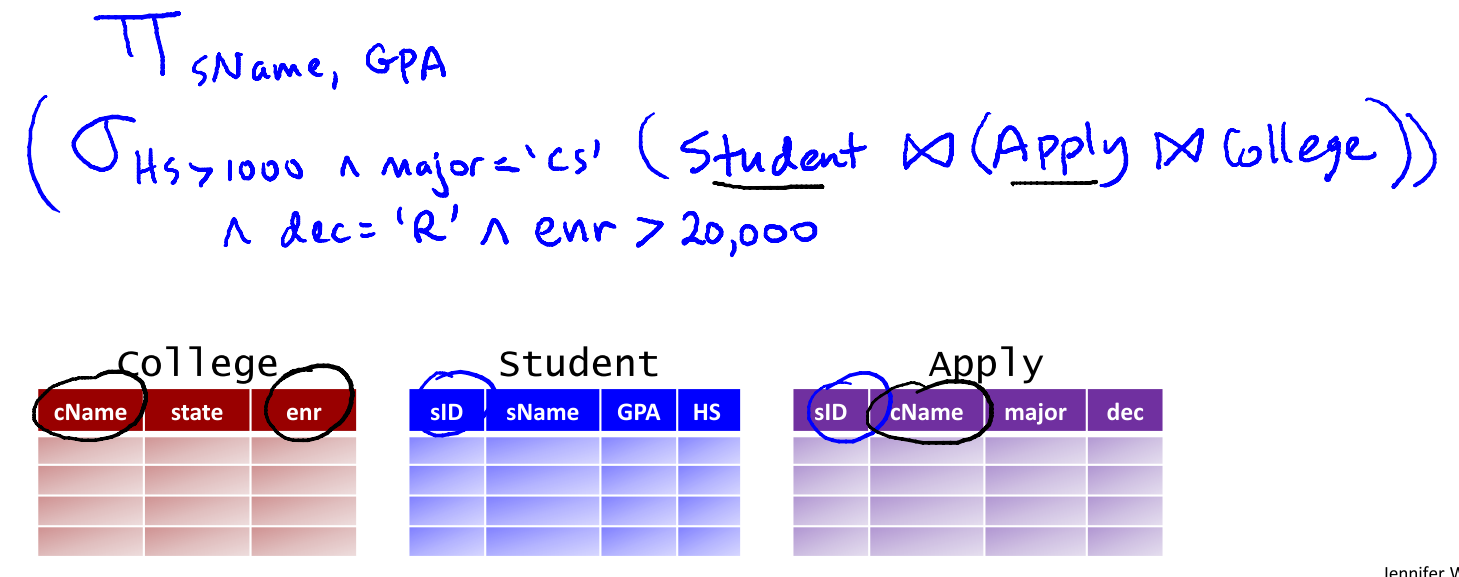

In [6]:
Image(filename="files/natural-join.png")

Don't need the condition $\sigma_{student.sID=Apply.sID}$ from the cross-product query.

A natural join can be rewritten, or is equivalent to a cross-product written in this way.

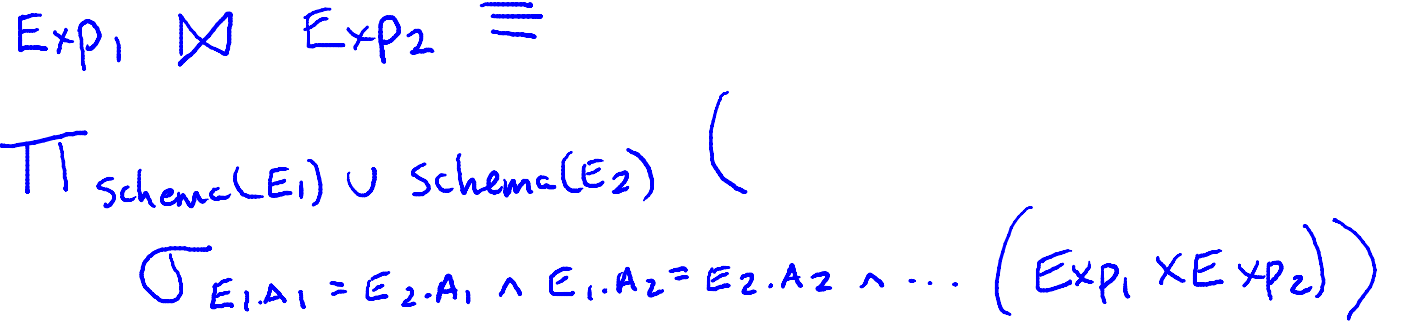

In [7]:
Image(filename='files/natural-join2.png')

I.e., you can write the equivalent expression in terms of only cross-product, but natural join is very convenient notationally.

Natural join: only rows occuring in both attributes with similar names are kept, i.e. values occuring in only one relation will be discarded? YES - they are discarded, see example [here](http://www.w3resource.com/sql/joins/natural-join.php)

## Theta Join

An abbreviation that don't add expressive power to the language, like natural join.

$Exp_1 \bowtie_\theta Exp_2 \equiv \sigma_\theta(Exp_1 \times Exp_2)$

where $\theta$ is a condition, in the style of the condition in the selection operator. (i.e. common condition.)

Why mention this? Because it is common that the theta join is basic operation for combining relations.

- Basic operation implemented in DBMS
- Term "join" often means theta join

## Summary of lecture 1

Queary (expression) on set fo relations produces relation as a result of

- Simplest query: relation name
- Use operators to filter, slice, combine
- Operators so far: select, project, cross-product, natural join, theta join

# Set Operators, Renaming, Notation (Lecture 2)

## Union operator

Standard union operator, as in probability. But recall, duplicates are eliminated automatically in relational algebra, so the behavior is not the same if similar values in the relations to be joined occur.

Whereas the natural join merges horizontally (columns), with the union the resulting relations will be vertical (like a list).

Example: $\pi_{cName}College \cup \pi_{sName}Student$ will result in a relation like:

|Relation|
|--------|
|Stanford|
|Susan|
|Cornell|
|Mary|
|John|
|...|

(but **technically**, to union two lists they have to have the same schema, the same attribute names. How to take care of this is shown below, under the Rename operator chapter).

## Difference operator

Can be extremely useful.. The operator is simply -.

Example query 1: IDs of students who didn't apply anywhere.

$\pi_{sID} Student - \pi_{sID}Apply$

Example query 2: IDs and names of students who didn't apply anywhere.

$\pi_{sID \land sName}((\pi_{sID} Student - \pi_{sID}Apply)\bowtie Student)$

RNN: not certain, but it seems like the difference operator only evaluates the first condition if several are given, like in $\pi_{sID,sName} Student - \pi_{sID,cName}Apply$ (only the sID value vil be evaluated).

## Intersection operator

Example query: Names that are both a college name and a student name.

$\pi_{cName}College \cap \pi_{sName}Student$

(but **technically**, to find the intersection between two lists they have to have the same schema, the same attribute names. How to take care of this is shown below, under the Rename operator chapter).

### Intersection doesn't add expressive power (1st way)

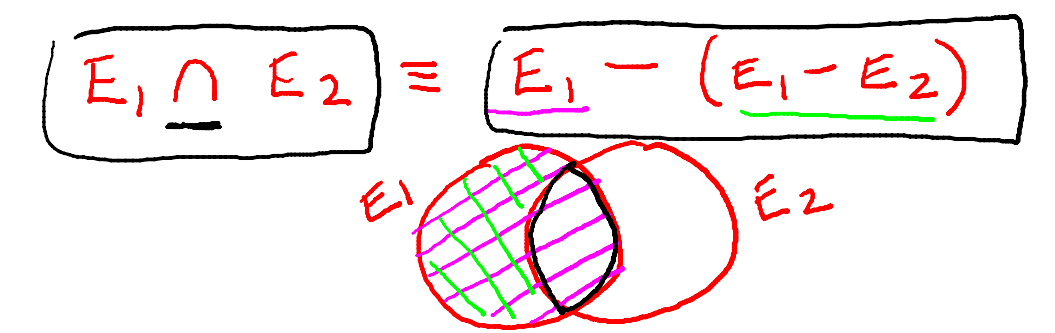

In [12]:
Image(filename="files/intersection.png")

### Intersection doesn't add expressive power (2nd way)

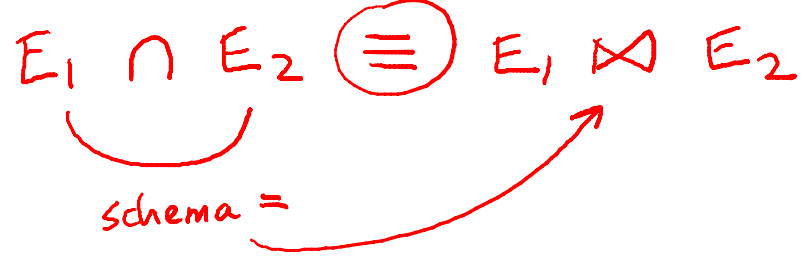

In [13]:
Image(filename="files/intersection2.png")

## Rename operator

(E = expression)

The rename operator reassigns the schema in the result of E.

Relation name: is the name of the (entire) relation (or table), like `College`, `Student` or `Apply`.

Attribute name: is the name of column (similar to variable or column name in a data frame). Examples: `cName`, `sID` or `major`.

(Tuple: equivalent to row in data frame.)

(A database schema is the skeleton structure that represents the logical view of the entire database.)

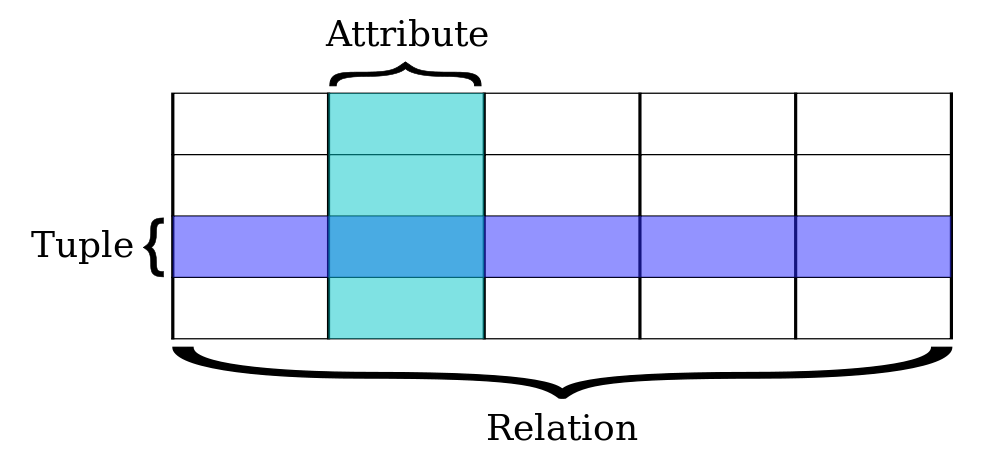

In [19]:
Image(filename="files/Relational_database_terms.png")

### Rename operator forms

1. General form: $\rho_{R(A_1,...,A_n)]}(E)$, where the $R(A_1,...,A_n)$ in subscript is the reassignment of the schema. With it, you can change the name of both the relation and the attributes.
2. Relation short form: $\rho_R(E)$, if you're only interested in changing the relation name.
3. Attributes short form: $\rho_{A_1,...,A_n]}(E)$, if you're only interested in changing the attribute names.

Form 2 and 3 are only abbreviations.

### Use case example 1: To unify schemas for set operators

Query: List of college and student names

$\rho_{c(name)}(\pi_{cName}College) \cup \rho_{c(name)}(\pi_{sName}Student)$

Now, we have to matching schemas and we can properly perform the union operation.

### Use case example 2: Disambiguation in "self-joins"

More complicated, but more important.

Query: Pairs of colleges in same state. E.g. Stanford - Berkeley, Berkeley - UCLA, etc.

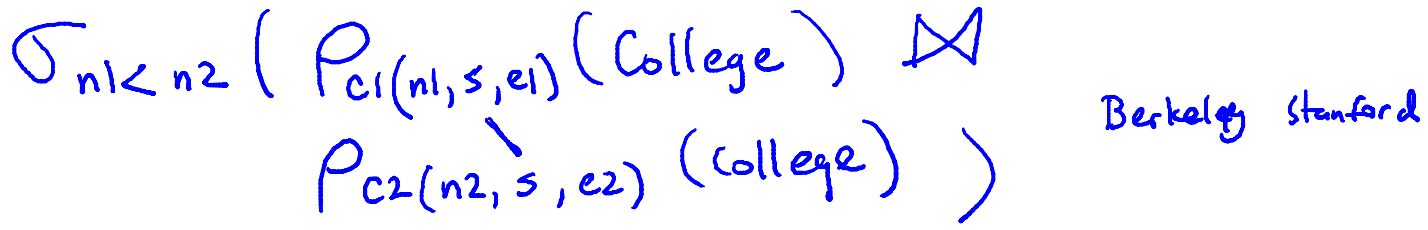

In [20]:
Image(filename="files/self-join.png")

Here, we rename rename both relations (c1, c2) to make them "joinable", then rename the attribute state to the same thing (s, s) so that the natural join merges on these attributes.

The n1 < n2 helps to avoid unwanted results, like

1. Colleges paired with themselves, e.g. Berkeley - Berkeley
2. Different order of the same pairs, e.g. Berkeley - Stanford, Stanford - Berkeley.

## Alternate notation 

### Assignment statements 

Some people prefer to write the queries in a more linear way, and some prefer to write it like a tree.

Query: Pairs of colleges in same state

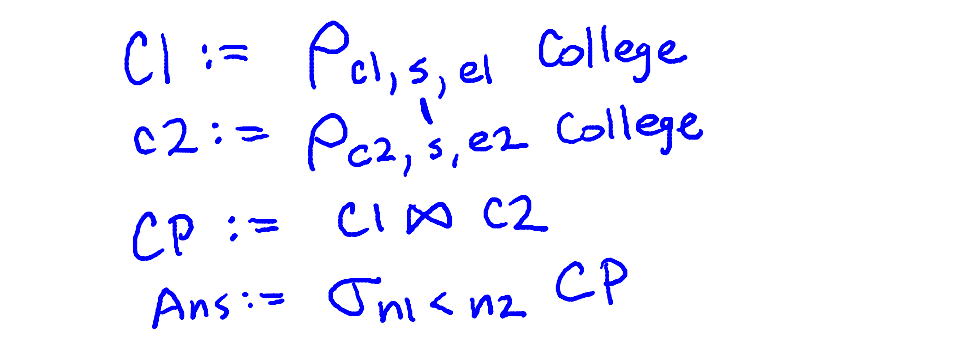

In [26]:
Image(filename="files/assignment2.png")

Equivalent to the expression shown above, under Rename operator, just with a different notation.

### Expression tree

Query: GPAs of students applying to CS in CA.

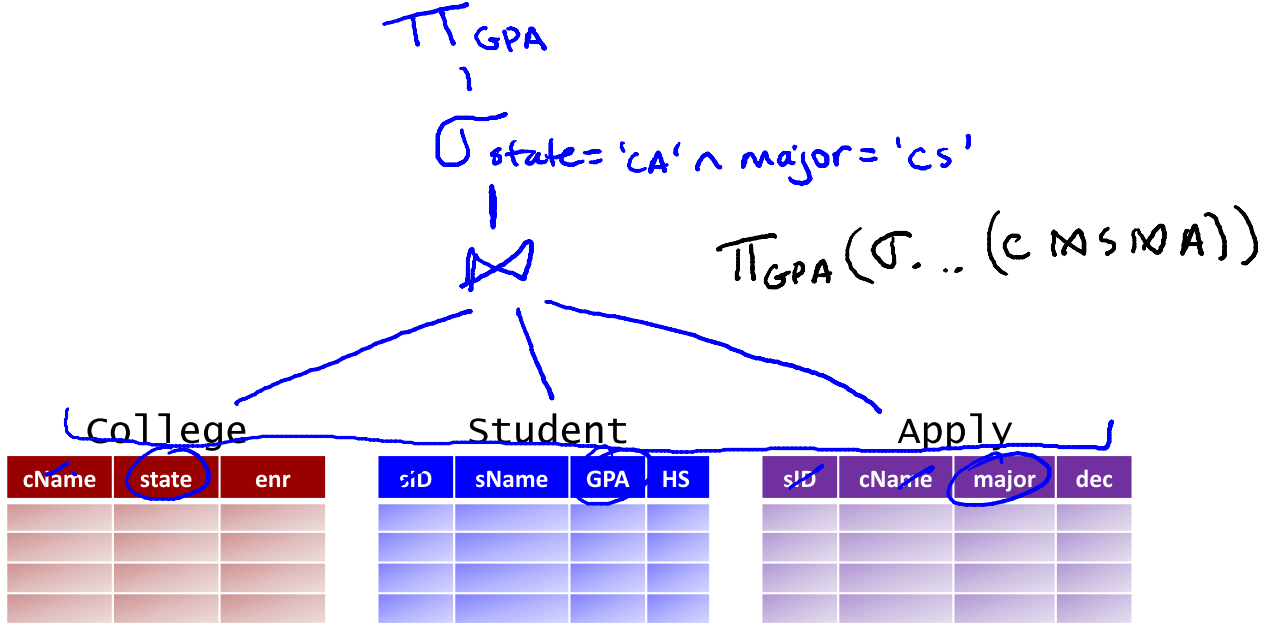

In [24]:
Image(filename="files/expression-tree.png")

Basically used for a more visual explanation of the query. It results in the original queary if one goes top-down (in black above).

# Summary

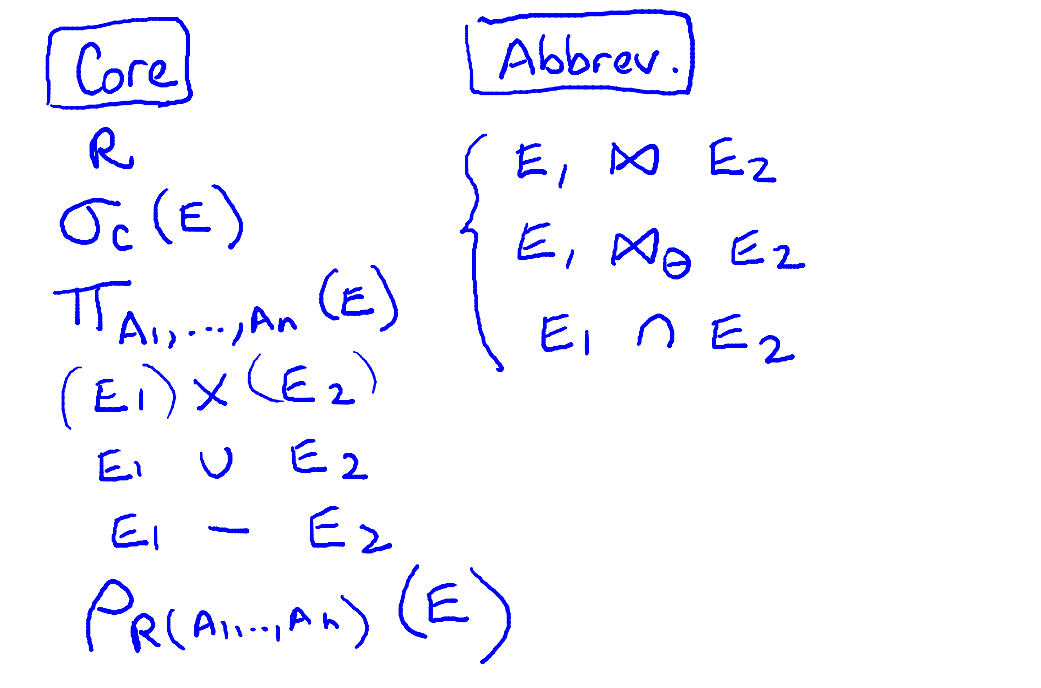

In [27]:
Image(filename="files/summary2.png")